In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats as sts

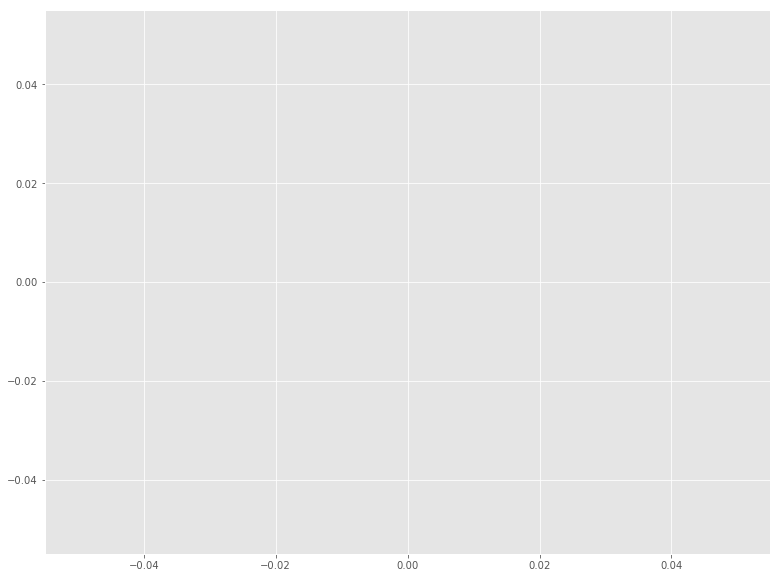

In [3]:
plt.figure(figsize=(13, 10))
plt.plot()
plt.show()

# Математика
## ЦПТ

Рассмотрим какое-нибудь сложное распределение, например <a href="https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%B5%D0%B9%D0%B1%D1%83%D0%BB%D0%BB%D0%B0">Вейбулла</a>

**1 сложность** - в scipy 3 реализации этого распределения:

- https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull
- https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.frechet_r.html#scipy.stats.frechet_r
- https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.frechet_l.html#scipy.stats.frechet_l

Заметим, что "двойной" Вейбулл это по сути сумма "левого" и "правого". При этом если посмотреть формулу на wiki - https://en.wikipedia.org/wiki/Weibull_distribution - то становится ясно, что нас интересует только правый.

**2 сложность** - в англоязычной и русскоязычной традициях часто принято использование различных параметров для одних и тех же распределений. Отличия не только в буквах, но и в величинах (иногда зависимость обратная, иногда с точностью до множителя!). **Обязательно используйте англоязычную вики как источник информации**


**3 сложность** - параметры распределения scipy могут отличаться от параметров в формуле Wiki! Внимательно изучите формулу в документации!

In [ ]:
#Просто скопируем код из документации, чтобы посмотреть на график распределения с разными параметрами.

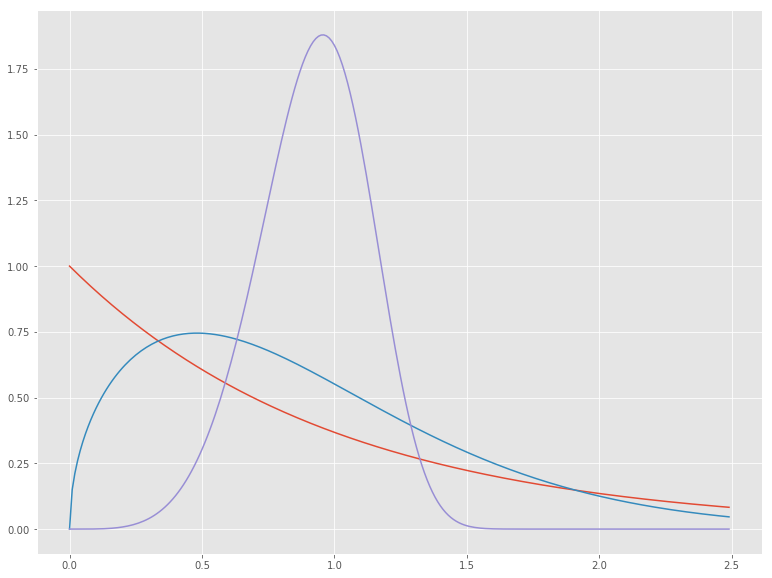

In [4]:
c = [1, 1.5, 5]

x = np.arange(0, 2.5, 0.01)
plt.figure(figsize=(13, 10))

rv = sts.frechet_r(c[0])
plt.plot(x, rv.pdf(x))

rv = sts.frechet_r(c[1])
plt.plot(x, rv.pdf(x))

rv = sts.frechet_r(c[2])
plt.plot(x, rv.pdf(x))

Теперь разберёмся что есть что.

Посмотрим формулу из wiki:
    
$$
f(x;\lambda,k) =
\begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases}$$

формулы из scipy:

<code>c \* x\*\*(c-1) \* exp(-x\*\*c)</code>

или

$$f(x) = c x^{c-1} e^{- x^c}$$

и

- <code>frechet_r.pdf(y, c) / scale</code>

- <code>y = (x - loc) / scale</code>

т.е.

1. $c = k$
2. $loc = 0$
3. $scale = \lambda$

In [ ]:
# Зададим параметры распределения:

In [5]:
k = 1
lam = 1
n = 75

In [6]:
rv = sts.frechet_r(c = k, loc = 0, scale = lam)

In [13]:
sample = rv.rvs(n)
sample

array([  3.54214077e-01,   1.83398684e+00,   2.00098740e+00,
         2.50310139e+00,   2.58941378e+00,   2.42655381e-01,
         4.29923306e-01,   2.31631303e+00,   9.78263370e-01,
         1.54396666e+00,   1.08212020e+00,   2.31400750e+00,
         2.11154341e-02,   7.18750886e-01,   9.21014090e-01,
         1.36428576e-01,   7.04465150e-02,   9.19840281e-01,
         2.36806977e+00,   7.67874930e-01,   9.32934799e-01,
         3.52292070e+00,   2.43598146e+00,   2.48321963e+00,
         4.43407160e-01,   7.90157302e-01,   3.31636822e-01,
         2.51134242e+00,   1.78216517e-01,   3.09476540e-01,
         1.96488473e-01,   8.91919336e-01,   1.53623117e+00,
         6.65520374e-01,   3.84481003e-01,   5.06819651e-01,
         2.30026933e-01,   2.76504220e-01,   4.64140197e-02,
         9.36148202e-01,   3.25899805e-01,   1.04719601e+00,
         8.99930495e-01,   4.85316910e-02,   8.09211599e-01,
         2.24291275e+00,   5.12681288e-01,   1.67218341e+00,
         3.00503706e-01,

In [14]:
sample.shape

(75L,)

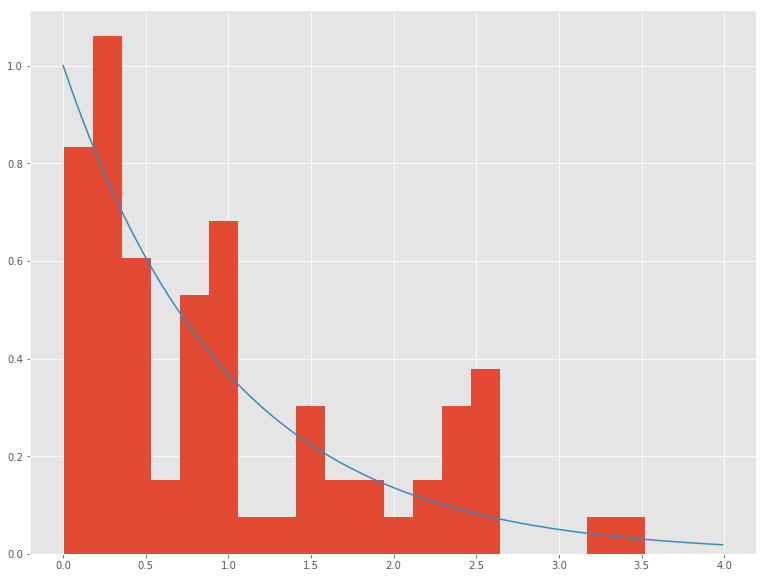

In [16]:
plt.figure(figsize=(13, 10))

x = np.arange(0, 4, 0.01)

plt.hist(sample, normed=True, bins=20)

plt.plot(x, rv.pdf(x))
plt.show()

In [18]:
sample = rv.rvs(size=(1000, n))
sample

array([[ 0.02205585,  4.86718151,  0.06136262, ...,  1.67129251,
         0.13960934,  1.31950308],
       [ 0.09356197,  1.21733974,  3.14200808, ...,  0.24685462,
         0.57053103,  3.30634869],
       [ 0.45485881,  3.84173297,  2.02040814, ...,  0.03866354,
         0.29508697,  1.92420197],
       ..., 
       [ 0.56524968,  1.3090253 ,  1.56450193, ...,  0.03196203,
         0.21262702,  0.91008468],
       [ 2.01277197,  0.04051491,  0.33709355, ...,  0.03800902,
         0.03857919,  0.2968953 ],
       [ 0.68149236,  0.01288261,  1.81442003, ...,  0.7544342 ,
         0.76839319,  0.64236981]])

In [19]:
sample.shape

(1000L, 75L)

In [20]:
sample.mean()

0.99872674875681244

In [22]:
means = sample.mean(axis=1)
means

array([ 0.96560819,  0.97955178,  1.12305868,  1.09102106,  1.10562833,
        0.97949055,  1.20507235,  0.96610885,  0.99611562,  0.94937705,
        1.02438621,  0.96845355,  0.97133002,  0.89184504,  1.04095771,
        1.22288869,  0.9296961 ,  0.93940496,  0.93600933,  1.04371677,
        1.02212612,  1.03682881,  0.89055545,  0.99199129,  0.87841824,
        1.08225008,  1.1216036 ,  1.07716687,  0.82395737,  1.14536673,
        1.33158592,  0.88808518,  0.92551675,  0.93848434,  0.90386573,
        1.05867923,  0.89944178,  0.90064147,  1.1404049 ,  0.84797523,
        1.16275719,  1.05896621,  0.77045627,  0.96844959,  1.02365645,
        1.06236581,  0.95433992,  0.85366667,  1.02026632,  1.1174667 ,
        1.04079729,  1.0744758 ,  1.03211094,  1.22933132,  0.99628999,
        1.0538648 ,  0.82254503,  0.80456477,  1.01851211,  1.20215995,
        0.97207521,  0.91376248,  0.92995933,  0.82646787,  0.95596004,
        0.82626354,  0.89844289,  1.11272844,  1.09824571,  0.90

In [23]:
means.shape

(1000L,)

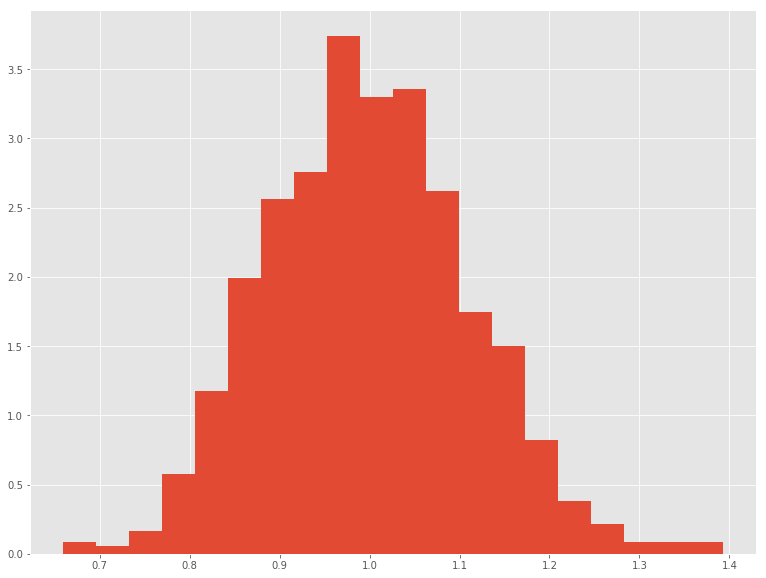

In [24]:
plt.figure(figsize=(13, 10))

plt.hist(means, normed=True, bins=20)
plt.show()

Мат ожидание:

$$E = \lambda \, \Gamma(1+1/k)$$

Дисперсия:
    
$$\sigma ^{2} = \lambda^2\left[\Gamma\left(1+\frac{2}{k}\right) - \left(\Gamma\left(1+\frac{1}{k}\right)\right)^2\right]$$

, где Г - https://en.wikipedia.org/wiki/Gamma_function

scipy Gamma - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma

**Проблема 4** - неудачный выбор распределения приводит к сложным формулам для вычисления теоретических значений дисперсии и мат ожидания

In [25]:
from scipy.special import gamma

In [26]:
E = lam * gamma(1 + 1 / k)
E

1.0

In [27]:
var = lam ** 2 * (gamma(1 + 2 / k) - gamma(1 + 1 / k)**2)
var

1.0

In [28]:
E_norm = E
var_norm = var / n

In [29]:
rv_norm = sts.norm(E_norm, var_norm**0.5)

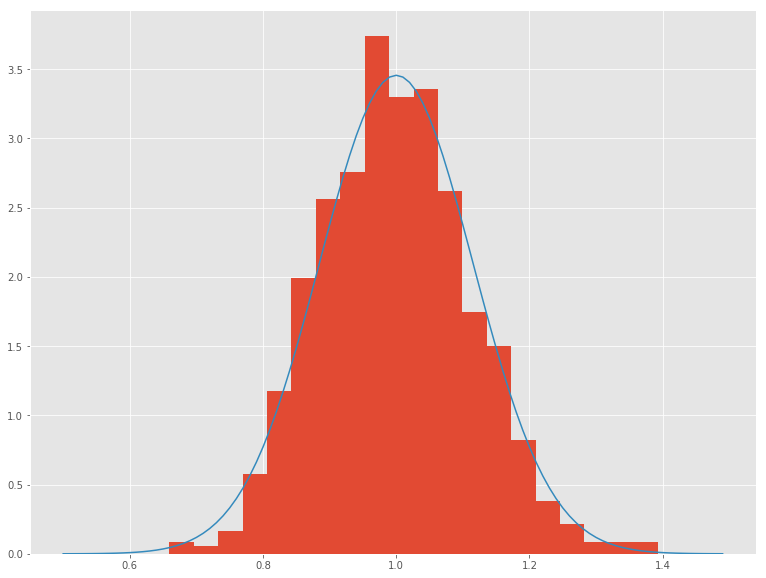

In [30]:
plt.figure(figsize=(13, 10))
x = np.arange(0.5, 1.5, 0.01)

plt.hist(means, normed=True, bins=20)
plt.plot(x, rv_norm.pdf(x))
plt.show()

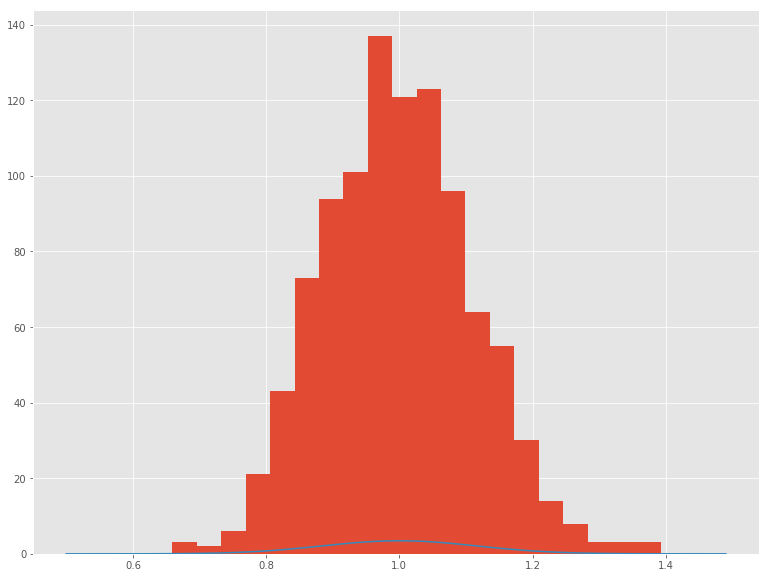

In [31]:
plt.figure(figsize=(13, 10))
x = np.arange(0.5, 1.5, 0.01)

plt.hist(means, bins=20)
plt.plot(x, rv_norm.pdf(x))
plt.show()

In [32]:
rv = sts.frechet_r(c = k, scale = lam)

In [33]:
rv.rvs(100000).mean()

0.99838406532534951

In [35]:
rv = sts.frechet_r(c = k, loc = 0, scale = lam)

In [36]:
rv.rvs(100000).mean()

0.99374683905500338